In [1]:
import pandas as pd
feats = pd.read_csv('bank_data_feats.csv', index_col=0)
target = pd.read_csv('bank_data_target.csv', index_col=0)

In [2]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=test_size, random_state=random_state)

In [3]:
X_train.shape

(3616, 32)

In [4]:
y_train.shape

(3616, 1)

In [5]:
X_test.shape

(905, 32)

In [6]:
y_test.shape

(905, 1)

In [41]:
#from keras.models import Sequential
#model = Sequential()
import tensorflow as tf
model = tf.keras.Sequential()

In [42]:
#from keras.layers import Dense, Activation
from tensorflow.keras.layers import Dense
input_shape = X_train.shape[1]
units = 1
model.add(Dense(units, input_dim=input_shape))
model.add(Activation('sigmoid'))

In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
history = model.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
91/91 [==============================] - 0s 2ms/step - loss: 436.5903 - accuracy: 0.1660 - val_loss: 407.2521 - val_accuracy: 0.1685
Epoch 2/10
91/91 [==============================] - 1s 8ms/step - loss: 310.8783 - accuracy: 0.1936 - val_loss: 270.3388 - val_accuracy: 0.2445
Epoch 3/10
91/91 [==============================] - 0s 1ms/step - loss: 187.6959 - accuracy: 0.3292 - val_loss: 141.0855 - val_accuracy: 0.3798
Epoch 4/10
91/91 [==============================] - 1s 9ms/step - loss: 77.5667 - accuracy: 0.4837 - val_loss: 32.4467 - val_accuracy: 0.6022
Epoch 5/10
91/91 [==============================] - 0s 1ms/step - loss: 10.7329 - accuracy: 0.8105 - val_loss: 4.8338 - val_accuracy: 0.8619
Epoch 6/10
91/91 [==============================] - 1s 9ms/step - loss: 4.0391 - accuracy: 0.8655 - val_loss: 2.0961 - val_accuracy: 0.8771
Epoch 7/10
91/91 [==============================] - 0s 1ms/step - loss: 1.1047 - accuracy: 0.8759 - val_loss: 0.6461 - val_accuracy: 0.8674
Epoch

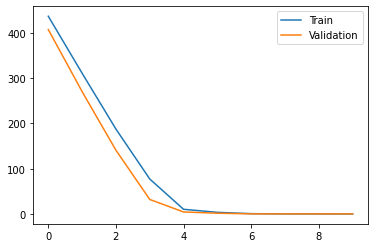

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

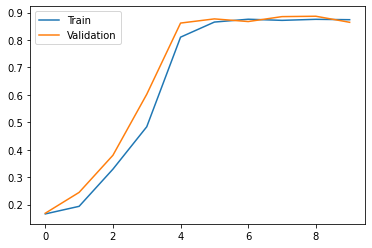

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [48]:
test_loss, test_acc = model.evaluate(X_test, y_test['y'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

29/29 [==============================] - 0s 8ms/step - loss: 0.5563 - accuracy: 0.8608
The loss on the test set is 0.5563 and the accuracy is 86.077%
